# Explore here

In [125]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()
# 
import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")



rawa_uri = 'https://open.spotify.com/artist/2AbQwU2cuEGfD465wCXlg2?si=MJUnVQPoQYG9Bhz8ssQz_w'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials( client_id=client_id, client_secret=client_secret))

results = spotify.artist_top_tracks(rawa_uri)
top_tracks = []
for track in results['tracks'][:5]:
    print('track    : ' + track['name'])
    print('duration :'  + str(track['duration_ms'] / 60000.12)+'min')
    print('popularity    : ' + str(round(track['duration_ms'] / 60000.12, 2)))
    print('cover art: ' + track['album']['images'][0]['url'])
    print()
    top_tracks.append(((track['name'], round(track['duration_ms'] / 60000.12, 2),track['popularity'])))




track    : Me Pasa (Piscis)
duration :3.3551099564467535min
popularity    : 3.36
cover art: https://i.scdn.co/image/ab67616d0000b27327195cf0beda68740d2ea551

track    : Brinca (Acuario)
duration :3.653676025981281min
popularity    : 3.65
cover art: https://i.scdn.co/image/ab67616d0000b27327195cf0beda68740d2ea551

track    : Hora Loca
duration :3.1970769391794547min
popularity    : 3.2
cover art: https://i.scdn.co/image/ab67616d0000b2732518e2526cf69abb761e42f6

track    : Binikini
duration :3.05421055824555min
popularity    : 3.05
cover art: https://i.scdn.co/image/ab67616d0000b2732518e2526cf69abb761e42f6

track    : Corazón Adentro (Escorpio)
duration :2.9444274444784444min
popularity    : 2.94
cover art: https://i.scdn.co/image/ab67616d0000b27327195cf0beda68740d2ea551



In [154]:
dt = pd.DataFrame(top_tracks)
dt.rename(columns={1: 'Tiempo', 2: 'Popularidad'}, inplace=True)

dt


,0,Tiempo,Popularidad
0,Me Pasa (Piscis),3.36,67
1,Brinca (Acuario),3.65,71
2,Hora Loca,3.20,68
3,Binikini,3.05,66
4,Corazón Adentro (Escorpio),2.94,64


In [158]:
dt_sort = dt.sort_values(by='Popularidad',ascending=False)
dt_top_3 = dt_sort.loc[dt_sort['Popularidad']>=67]
dt_top_3

,0,Tiempo,Popularidad
1,Brinca (Acuario),3.65,71
2,Hora Loca,3.20,68
0,Me Pasa (Piscis),3.36,67


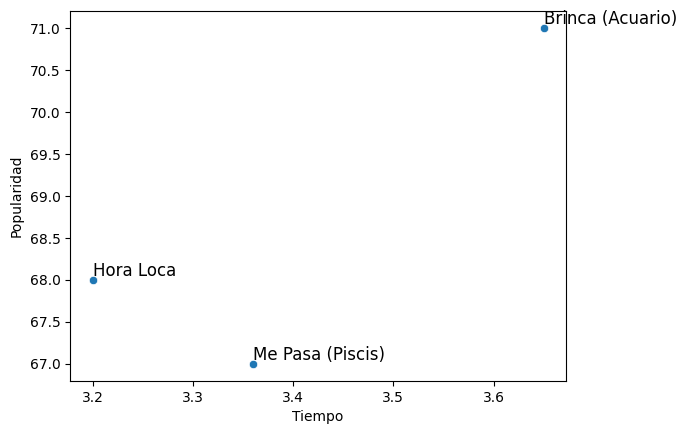

In [163]:
import matplotlib.pyplot as plt
sns.scatterplot(x=dt_top_3['Tiempo'],y=dt_top_3['Popularidad'])

# Agregar etiquetas a cada punto
for i in range(len(dt_top_3)):
    plt.text(dt_top_3["Tiempo"][i], dt_top_3['Popularidad'][i], dt_top_3[0][i], 
             horizontalalignment='left', verticalalignment='bottom', 
             fontsize=12, color='black')


plt.show()

Dada la escasez de datos, es difícil llegar a una conclusión sólida. Según lo observado en el gráfico, no hay suficiente evidencia para sostener que las canciones más cortas sean más populares. Además, el análisis no considera cuándo se lanzaron las canciones: con el tiempo, su popularidad podría disminuir independientemente de su duración, lo que añade otra variable no contemplada, tambien se podría tomar en cuenta más variables como género musical, artista, promoción, etc.